In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import operator
from datetime import datetime
import seaborn as sns
import numpy as np
%matplotlib inline


In [2]:
dateparse=lambda x:pd.datetime.strptime(x,"%Y-%m-%d %H:%M:%S")
data_file1=pd.read_csv("../dataset/file1.csv",sep="|",parse_dates=["Date"],date_parser=dateparse)
data_file1

,Lat Code,Long Code,SEId,RouteId,StoreId,Date,SalesVolumeKG,SalesVolumeLt,SalesGrossValue,SalesTaxValue,SalesNetValue,TotalLines,FlgPlanned,FlgCovered,FlgProductive,PlannedCalls,ActualCalls,ProductiveCalls,FlgNewStore
0,17.701415,74.161672,0,567,40827,2016-06-11,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,1
1,18.543995,73.782319,216,1558,51711,2016-06-06,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
2,18.452870,73.882522,307,1599,52251,2016-06-06,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
3,22.996360,72.663287,94,753,37206,2016-06-07,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
4,15.390768,73.995228,67,526,41378,2016-06-06,0.00,3.0,1146.3830,57.32,1203.7030,2,0,1,1,0,1,1,0
5,18.463587,73.874297,307,1599,52306,2016-06-06,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
6,16.688330,74.464402,51,397,42043,2016-06-10,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
7,15.401975,74.009523,67,2370,42521,2016-06-09,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
8,18.562807,73.820948,216,1557,54292,2016-06-11,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
9,16.292605,73.745458,47,600,43604,2016-06-09,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0


In [3]:
data_file2=pd.read_csv("../dataset/file2.csv",sep="|",parse_dates=["Date"],date_parser=dateparse)
data_file2

,RouteId,StoreId,Date,OrderID,OrderDetailID,ProductID,UOM,OrderQty,Order Volume KG/LTR,OrderValBeforeTax,TaxValue,OrderValAfterTax
0,261,36732,2016-05-23,8361,19796,13,Lt,5,1.00,429.0000,21.45,450.4500
1,261,36717,2016-05-23,8365,19802,20,Lt,2,1.00,388.0070,19.40,407.4070
2,261,36732,2016-05-30,13160,31290,4,Lt,10,1.00,446.1580,22.31,468.4680
3,261,33175,2016-06-27,30735,67105,4,Lt,10,1.00,446.1580,22.31,468.4680
4,261,38600,2016-07-04,34760,74518,13,Lt,5,1.00,429.0000,21.45,450.4500
5,261,33147,2016-07-25,44594,93601,13,Lt,5,1.00,429.0000,21.45,450.4500
6,261,33175,2016-08-01,46883,97949,4,Lt,5,0.50,223.0840,11.15,234.2340
7,261,38600,2016-08-01,46911,98001,13,Lt,5,1.00,429.0000,21.45,450.4500
8,261,36582,2016-08-27,65804,137286,4,Lt,10,1.00,446.1580,22.31,468.4680
9,261,33138,2016-09-12,77146,161344,4,Lt,10,1.00,446.1580,22.31,468.4680


In [4]:
set(list(data_file1.columns)).intersection(set(list(data_file2.columns)))

{'Date', 'RouteId', 'StoreId'}

In [5]:
data_file1.isnull().sum()/data_file1.isnull().count()

Lat Code           0.374596
Long Code          0.374596
SEId               0.000000
RouteId            0.000000
StoreId            0.000000
Date               0.000000
SalesVolumeKG      0.000000
SalesVolumeLt      0.000000
SalesGrossValue    0.000000
SalesTaxValue      0.000000
SalesNetValue      0.000000
TotalLines         0.000000
FlgPlanned         0.000000
FlgCovered         0.000000
FlgProductive      0.000000
PlannedCalls       0.000000
ActualCalls        0.000000
ProductiveCalls    0.000000
FlgNewStore        0.000000
dtype: float64

In [6]:
data_file2.isnull().sum()/data_file2.isnull().count()

RouteId                0.000000
StoreId                0.000000
Date                   0.000000
OrderID                0.000000
OrderDetailID          0.000000
ProductID              0.000000
UOM                    0.000000
OrderQty               0.000000
Order Volume KG/LTR    0.000000
OrderValBeforeTax      0.000000
TaxValue               0.000024
OrderValAfterTax       0.000000
dtype: float64

In [7]:
nan_file_1=data_file1.loc[data_file1["Lat Code"].isnull()]
nan_file_1

,Lat Code,Long Code,SEId,RouteId,StoreId,Date,SalesVolumeKG,SalesVolumeLt,SalesGrossValue,SalesTaxValue,SalesNetValue,TotalLines,FlgPlanned,FlgCovered,FlgProductive,PlannedCalls,ActualCalls,ProductiveCalls,FlgNewStore
43,NaN,NaN,59,411,23776,2016-06-17,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
134,NaN,NaN,225,1307,64869,2016-08-04,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
135,NaN,NaN,137,1262,57790,2016-08-06,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
140,NaN,NaN,321,1586,69269,2016-08-01,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
141,NaN,NaN,0,1257,57175,2016-08-02,0.60,0.0,142.8600,7.14,150.0000,1,0,1,1,0,1,1,0
143,NaN,NaN,139,2379,57681,2016-08-02,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
150,NaN,NaN,0,1265,57258,2016-08-04,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
165,NaN,NaN,0,1257,57156,2016-08-02,2.40,0.0,238.0898,11.91,249.9998,2,0,1,1,0,1,1,0
227,NaN,NaN,59,411,22821,2016-06-17,0.00,1.0,388.0070,19.40,407.4070,1,0,1,1,0,1,1,0
251,NaN,NaN,282,2400,57662,2016-06-18,0.00,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,1


In [8]:
list(nan_file_1.index)
data_file1.drop(list(nan_file_1.index),inplace=True)
data_file1.isnull().sum()/data_file1.isnull().count()

Lat Code           0.0
Long Code          0.0
SEId               0.0
RouteId            0.0
StoreId            0.0
Date               0.0
SalesVolumeKG      0.0
SalesVolumeLt      0.0
SalesGrossValue    0.0
SalesTaxValue      0.0
SalesNetValue      0.0
TotalLines         0.0
FlgPlanned         0.0
FlgCovered         0.0
FlgProductive      0.0
PlannedCalls       0.0
ActualCalls        0.0
ProductiveCalls    0.0
FlgNewStore        0.0
dtype: float64

In [9]:
data_file1

,Lat Code,Long Code,SEId,RouteId,StoreId,Date,SalesVolumeKG,SalesVolumeLt,SalesGrossValue,SalesTaxValue,SalesNetValue,TotalLines,FlgPlanned,FlgCovered,FlgProductive,PlannedCalls,ActualCalls,ProductiveCalls,FlgNewStore
0,17.701415,74.161672,0,567,40827,2016-06-11,0.0,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,1
1,18.543995,73.782319,216,1558,51711,2016-06-06,0.0,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
2,18.452870,73.882522,307,1599,52251,2016-06-06,0.0,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
3,22.996360,72.663287,94,753,37206,2016-06-07,0.0,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
4,15.390768,73.995228,67,526,41378,2016-06-06,0.0,3.0,1146.3830,57.32,1203.7030,2,0,1,1,0,1,1,0
5,18.463587,73.874297,307,1599,52306,2016-06-06,0.0,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
6,16.688330,74.464402,51,397,42043,2016-06-10,0.0,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
7,15.401975,74.009523,67,2370,42521,2016-06-09,0.0,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
8,18.562807,73.820948,216,1557,54292,2016-06-11,0.0,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0
9,16.292605,73.745458,47,600,43604,2016-06-09,0.0,0.0,0.0000,0.00,0.0000,0,0,1,0,0,1,0,0


In [10]:
#datetime.strptime(data_file1['Date'][5],"%Y-%m-%d %H:%M:%S")
#data_file1['Date'][66].day
#data_file1["Date"].dt.day

In [11]:
#data_file1['year'] = data_file1.Date.apply(lambda x: x.split(" ")[0].split("-")[0])
data_file1["Year"]=data_file1["Date"].dt.year
data_file1['Year'] = data_file1['Year'].astype(float)
#data_file1['month'] = data_file1.Date.apply(lambda x: x.split(" ")[0].split("-")[1])
data_file1["Month"]=data_file1["Date"].dt.month
data_file1['Month'] = data_file1['Month'].astype(float)
#data_file1['day'] = data_file1.Date.apply(lambda x: x.split(" ")[0].split("-")[2])
data_file1["Day"]=data_file1["Date"].dt.day
data_file1['Day'] = data_file1['Day'].astype(float)
data_file1

,Lat Code,Long Code,SEId,RouteId,StoreId,Date,SalesVolumeKG,SalesVolumeLt,SalesGrossValue,SalesTaxValue,...,FlgPlanned,FlgCovered,FlgProductive,PlannedCalls,ActualCalls,ProductiveCalls,FlgNewStore,Year,Month,Day
0,17.701415,74.161672,0,567,40827,2016-06-11,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,1,2016.0,6.0,11.0
1,18.543995,73.782319,216,1558,51711,2016-06-06,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,6.0
2,18.452870,73.882522,307,1599,52251,2016-06-06,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,6.0
3,22.996360,72.663287,94,753,37206,2016-06-07,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,7.0
4,15.390768,73.995228,67,526,41378,2016-06-06,0.0,3.0,1146.3830,57.32,...,0,1,1,0,1,1,0,2016.0,6.0,6.0
5,18.463587,73.874297,307,1599,52306,2016-06-06,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,6.0
6,16.688330,74.464402,51,397,42043,2016-06-10,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,10.0
7,15.401975,74.009523,67,2370,42521,2016-06-09,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,9.0
8,18.562807,73.820948,216,1557,54292,2016-06-11,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,11.0
9,16.292605,73.745458,47,600,43604,2016-06-09,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,9.0


In [12]:

def group_analysis(column_name,reference_column,reference_value):
    productive_dict=data_file1.loc[data_file1[reference_column]==reference_value].groupby(data_file1[column_name]).groups
    productive_dict={key:len(value) for key,value in productive_dict.items()}
    productive_dict = sorted(productive_dict.items(), key=operator.itemgetter(1))

    return productive_dict

def group_to_arrays(group):
    array_x=[]
    array_y=[]
    for elements in group:
        x,y=elements
        array_x.append(x)
        array_y.append(y)
    return array_x,array_y

In [13]:
def render_grouped_productive(column_name,reference_column,reference_value,axis_label_x,axis_label_y):
    productive=group_analysis(column_name,reference_column,reference_value)
    least_10_productive=productive[:10]
    most_10_productive=productive[-10:]
    array_least_x,array_least_y=group_to_arrays(least_10_productive)
    dataframe_least={axis_label_x:array_least_x,axis_label_y:array_least_y}
    array_most_x,array_most_y=group_to_arrays(most_10_productive)
    dataframe_most={axis_label_x:array_most_x,axis_label_y:array_most_y}
    fig, cnt =plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    ax = sns.barplot(x=axis_label_x, y=axis_label_y, data=dataframe_least, palette="Blues_d",ax=cnt[0])
    ax.set(xlabel=axis_label_x, ylabel=axis_label_y,title="Least Productive calls "+column_name)
    ax1 = sns.barplot(x=axis_label_x, y=axis_label_y, data=dataframe_most, palette="Blues_d",ax=cnt[1])
    ax1.set(xlabel=axis_label_x, ylabel=axis_label_y,title="Most Productive calls "+column_name)
    
    fig.show()

def render_grouped_unproductive(column_name,reference_column,reference_value,axis_label_x,axis_label_y):
    productive=group_analysis(column_name,reference_column,reference_value)
    least_10_unproductive=productive[:10]
    most_10_unproductive=productive[-10:]
    array_least_x,array_least_y=group_to_arrays(least_10_unproductive)
    dataframe_least={axis_label_x:array_least_x,axis_label_y:array_least_y}
    array_most_x,array_most_y=group_to_arrays(most_10_unproductive)
    dataframe_most={axis_label_x:array_most_x,axis_label_y:array_most_y}
    fig, cnt =plt.subplots(nrows=1, ncols=2, figsize=(20,10))
    ax = sns.barplot(x=axis_label_x, y=axis_label_y, data=dataframe_least, palette="Blues_d",ax=cnt[0])
    ax.set(xlabel=axis_label_x, ylabel=axis_label_y,title="Least UnProductive calls "+column_name)
    ax1 = sns.barplot(x=axis_label_x, y=axis_label_y, data=dataframe_most, palette="Blues_d",ax=cnt[1])
    ax1.set(xlabel=axis_label_x, ylabel=axis_label_y,title="Most UnProductive calls "+column_name)
    
    fig.show()


    

/Users/jasdeep/PycharmProjects/predictive_standalone/pred_env/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


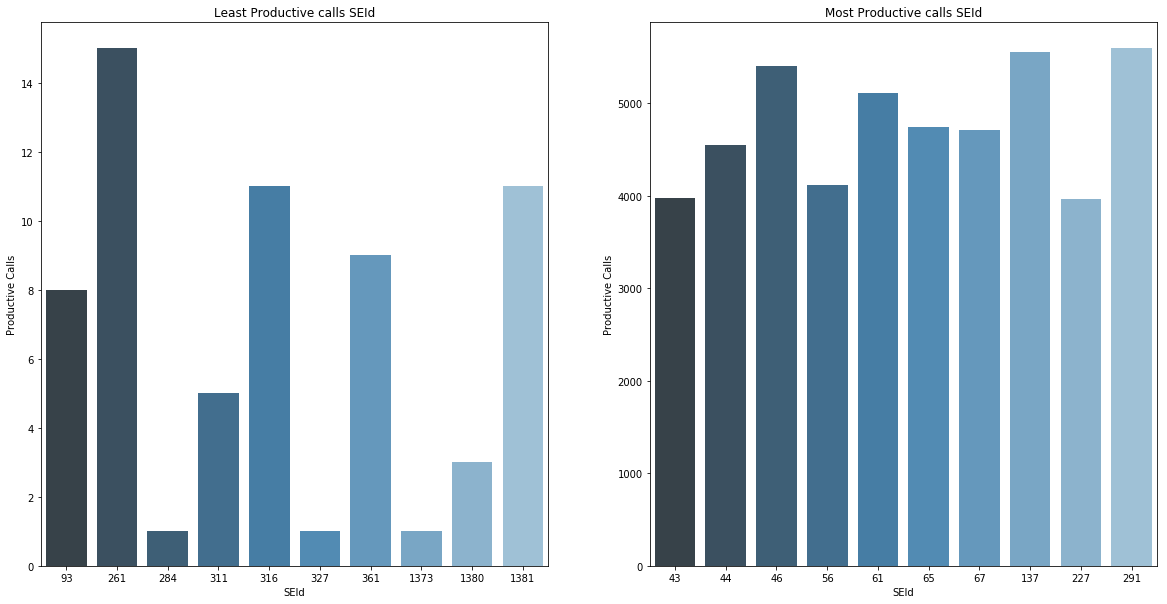

In [14]:
render_grouped_productive("SEId","ProductiveCalls",1,'SEId',"Productive Calls")


/Users/jasdeep/PycharmProjects/predictive_standalone/pred_env/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


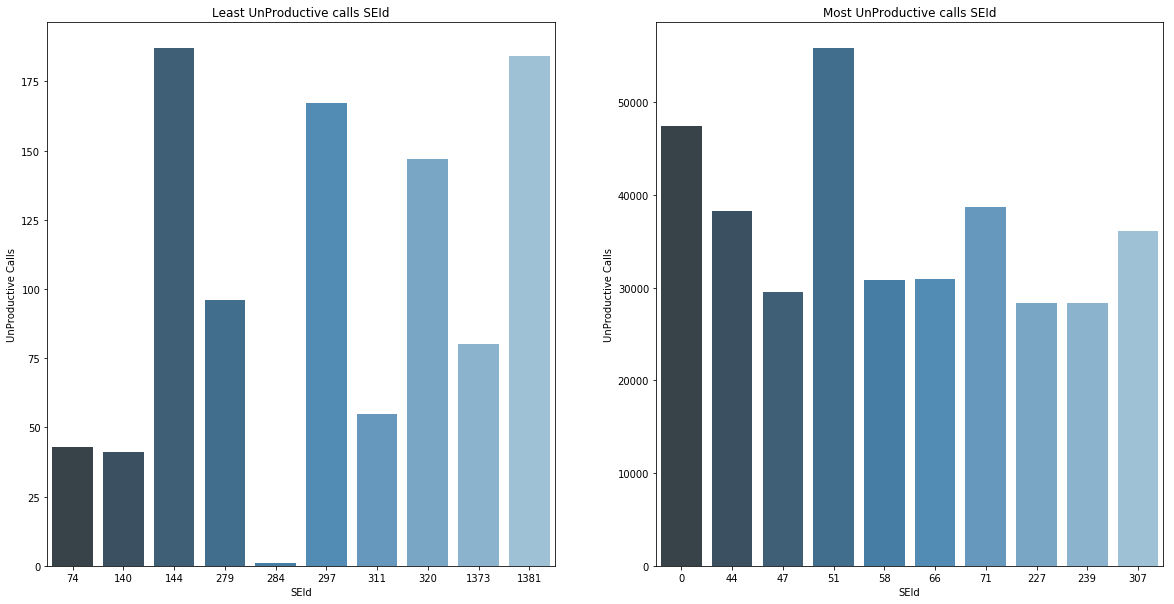

In [15]:
render_grouped_unproductive("SEId","ProductiveCalls",0,'SEId',"UnProductive Calls")


/Users/jasdeep/PycharmProjects/predictive_standalone/pred_env/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


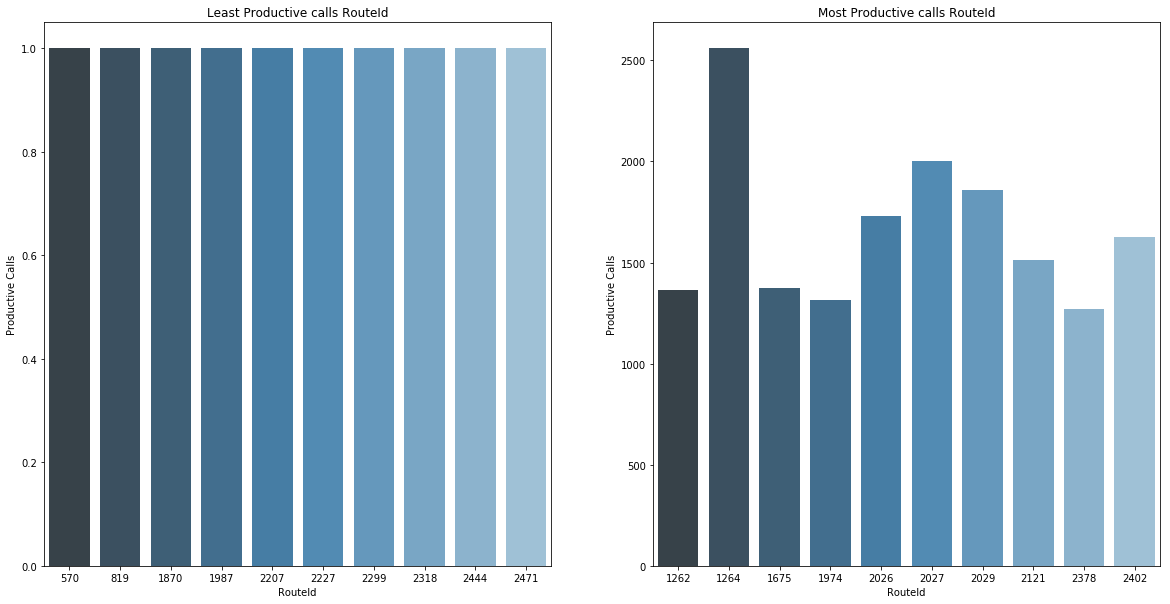

In [16]:
render_grouped_productive("RouteId","ProductiveCalls",1,'RouteId',"Productive Calls")


/Users/jasdeep/PycharmProjects/predictive_standalone/pred_env/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


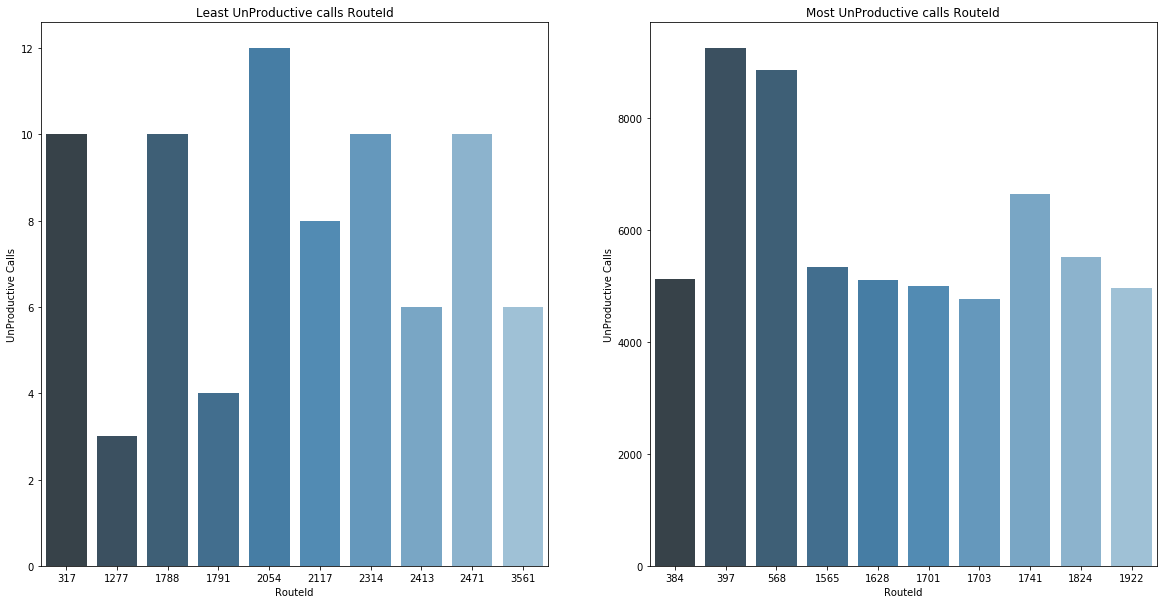

In [17]:
render_grouped_unproductive("RouteId","ProductiveCalls",0,'RouteId',"UnProductive Calls")


/Users/jasdeep/PycharmProjects/predictive_standalone/pred_env/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


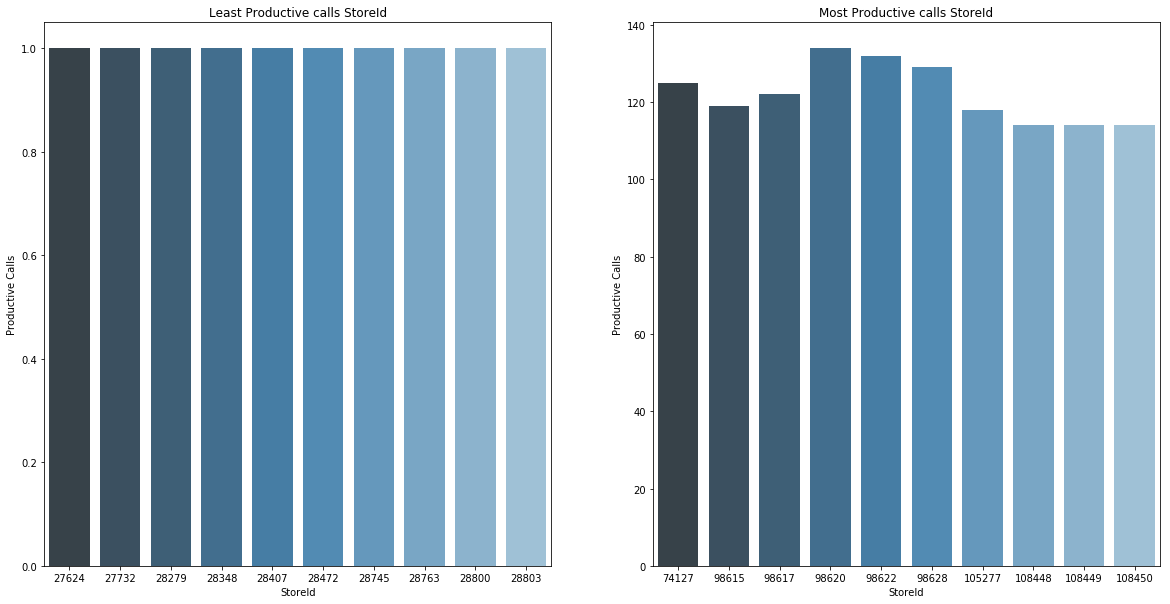

In [18]:
render_grouped_productive("StoreId","ProductiveCalls",1,'StoreId',"Productive Calls")


/Users/jasdeep/PycharmProjects/predictive_standalone/pred_env/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


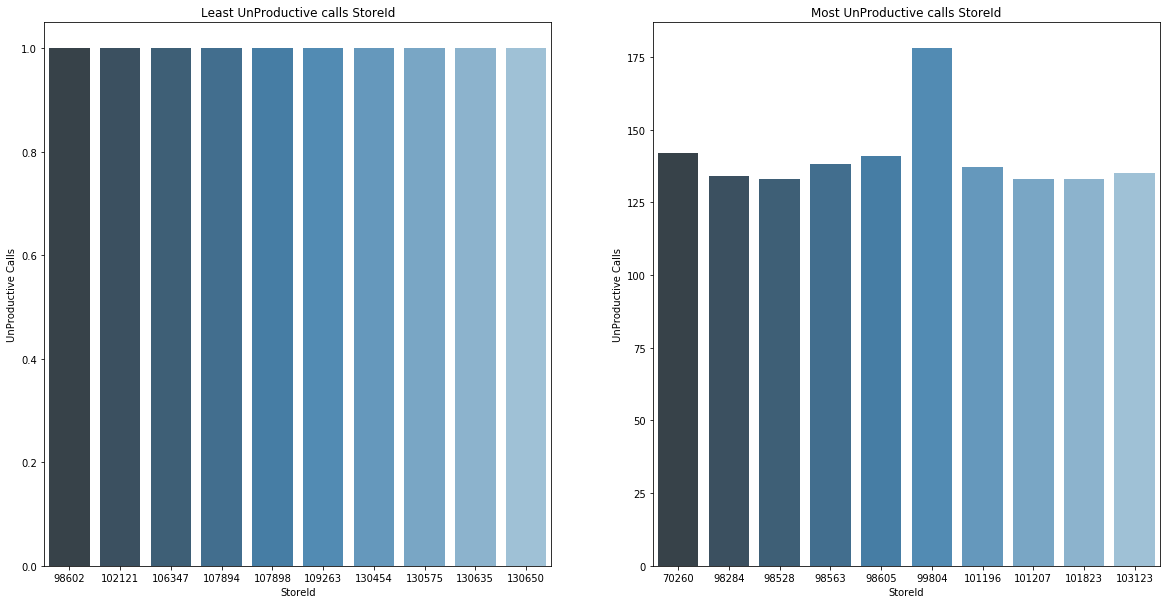

In [19]:
render_grouped_unproductive("StoreId","ProductiveCalls",0,'StoreId',"UnProductive Calls")

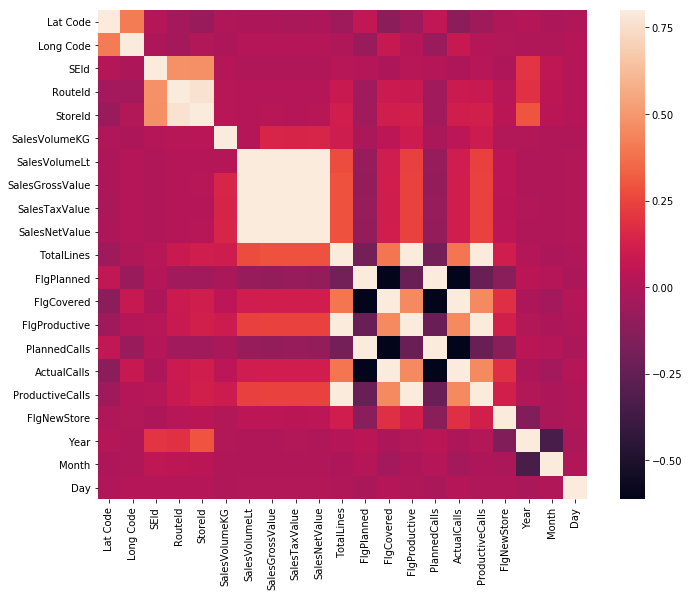

In [20]:
#correlation matrix
corrmat = data_file1.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);


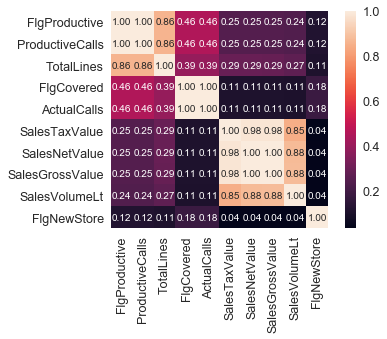

In [21]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'ProductiveCalls')['ProductiveCalls'].index
cm = np.corrcoef(data_file1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [22]:
data_file1

,Lat Code,Long Code,SEId,RouteId,StoreId,Date,SalesVolumeKG,SalesVolumeLt,SalesGrossValue,SalesTaxValue,...,FlgPlanned,FlgCovered,FlgProductive,PlannedCalls,ActualCalls,ProductiveCalls,FlgNewStore,Year,Month,Day
0,17.701415,74.161672,0,567,40827,2016-06-11,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,1,2016.0,6.0,11.0
1,18.543995,73.782319,216,1558,51711,2016-06-06,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,6.0
2,18.452870,73.882522,307,1599,52251,2016-06-06,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,6.0
3,22.996360,72.663287,94,753,37206,2016-06-07,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,7.0
4,15.390768,73.995228,67,526,41378,2016-06-06,0.0,3.0,1146.3830,57.32,...,0,1,1,0,1,1,0,2016.0,6.0,6.0
5,18.463587,73.874297,307,1599,52306,2016-06-06,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,6.0
6,16.688330,74.464402,51,397,42043,2016-06-10,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,10.0
7,15.401975,74.009523,67,2370,42521,2016-06-09,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,9.0
8,18.562807,73.820948,216,1557,54292,2016-06-11,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,11.0
9,16.292605,73.745458,47,600,43604,2016-06-09,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,9.0


In [23]:
new_store_data=data_file1.loc[data_file1["FlgNewStore"]==1]
new_store_data

,Lat Code,Long Code,SEId,RouteId,StoreId,Date,SalesVolumeKG,SalesVolumeLt,SalesGrossValue,SalesTaxValue,...,FlgPlanned,FlgCovered,FlgProductive,PlannedCalls,ActualCalls,ProductiveCalls,FlgNewStore,Year,Month,Day
0,17.701415,74.161672,0,567,40827,2016-06-11,0.00,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2016.0,6.0,11.0
13,20.095727,73.928578,239,1624,55009,2016-06-10,3.60,10.0,830.622,18.18,...,0,1,1,0,1,1,1,2016.0,6.0,10.0
14,20.913223,74.774075,58,1627,55052,2016-06-10,0.00,3.0,1263.165,63.16,...,0,1,1,0,1,1,1,2016.0,6.0,10.0
15,20.022660,73.808318,112,1622,54927,2016-06-09,0.00,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2016.0,6.0,9.0
17,20.022660,73.808318,112,1622,54898,2016-06-09,0.00,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2016.0,6.0,9.0
20,20.022660,73.808318,112,1622,54920,2016-06-09,0.00,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2016.0,6.0,9.0
23,18.472247,73.891240,307,1908,55140,2016-06-10,0.00,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2016.0,6.0,10.0
26,20.522070,76.187815,63,311,55269,2016-06-10,0.00,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2016.0,6.0,10.0
29,20.896837,74.777117,58,1628,55594,2016-06-12,0.00,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2016.0,6.0,12.0
33,17.683108,73.986637,0,575,40624,2016-06-10,0.00,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2016.0,6.0,10.0


In [24]:
old_store_data=data_file1.loc[data_file1["FlgNewStore"]==0]
old_store_data

,Lat Code,Long Code,SEId,RouteId,StoreId,Date,SalesVolumeKG,SalesVolumeLt,SalesGrossValue,SalesTaxValue,...,FlgPlanned,FlgCovered,FlgProductive,PlannedCalls,ActualCalls,ProductiveCalls,FlgNewStore,Year,Month,Day
1,18.543995,73.782319,216,1558,51711,2016-06-06,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,6.0
2,18.452870,73.882522,307,1599,52251,2016-06-06,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,6.0
3,22.996360,72.663287,94,753,37206,2016-06-07,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,7.0
4,15.390768,73.995228,67,526,41378,2016-06-06,0.0,3.0,1146.3830,57.32,...,0,1,1,0,1,1,0,2016.0,6.0,6.0
5,18.463587,73.874297,307,1599,52306,2016-06-06,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,6.0
6,16.688330,74.464402,51,397,42043,2016-06-10,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,10.0
7,15.401975,74.009523,67,2370,42521,2016-06-09,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,9.0
8,18.562807,73.820948,216,1557,54292,2016-06-11,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,11.0
9,16.292605,73.745458,47,600,43604,2016-06-09,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,9.0
10,23.246242,72.495292,99,785,35473,2016-06-06,0.0,0.0,0.0000,0.00,...,0,1,0,0,1,0,0,2016.0,6.0,6.0


In [25]:
len(new_store_data.StoreId.unique())

32413

In [26]:
multiple_visited_new_stores_count=new_store_data["StoreId"].value_counts().loc[new_store_data["StoreId"].value_counts().values>1]
once_visited_new_stores_count=new_store_data["StoreId"].value_counts().loc[new_store_data["StoreId"].value_counts().values==1]
multiple_visited_new_stores_id=list(multiple_visited_new_stores_count.index)
once_visited_new_stores_id=list(once_visited_new_stores_count.index)
len(multiple_visited_new_stores_id)

1563

In [27]:
multiple_visited_new_stores=new_store_data[new_store_data["StoreId"].isin(multiple_visited_new_stores_id)]

In [28]:
once_visited_new_stores=new_store_data[new_store_data["StoreId"].isin(once_visited_new_stores_id)]

In [29]:
multiple_visit_converted_old=old_store_data[old_store_data["StoreId"].isin(multiple_visited_new_stores_id)]

In [30]:
once_visit_converted_old=old_store_data[old_store_data["StoreId"].isin(once_visited_new_stores_id)]

In [31]:
len(old_store_data.StoreId.unique())

34553

In [32]:
old_store_data_count=old_store_data["StoreId"].value_counts()
old_store_data_count_id=list(old_store_data_count.index)
old_store_data_count_id

[98701,
 99804,
 70345,
 109831,
 109852,
 109837,
 109864,
 109834,
 109836,
 109866,
 109830,
 109861,
 109844,
 109840,
 109838,
 109845,
 109857,
 109833,
 109856,
 109863,
 70134,
 76739,
 98478,
 76590,
 98425,
 74127,
 101059,
 116781,
 74828,
 116783,
 101058,
 109104,
 101657,
 100558,
 101451,
 56932,
 100570,
 70260,
 56929,
 101823,
 98268,
 98552,
 98499,
 98508,
 102420,
 102504,
 98288,
 68349,
 98653,
 68219,
 98468,
 98547,
 99809,
 98651,
 98512,
 98650,
 98536,
 98284,
 98542,
 98528,
 98534,
 98525,
 99021,
 98550,
 98520,
 98505,
 98360,
 98502,
 98558,
 98530,
 98561,
 98557,
 98515,
 98264,
 97802,
 98553,
 98370,
 98563,
 98266,
 98539,
 98614,
 98969,
 98522,
 98616,
 98194,
 98197,
 99345,
 99817,
 99382,
 98199,
 98196,
 100148,
 98202,
 98207,
 98205,
 98652,
 98203,
 98200,
 99797,
 98201,
 98208,
 99352,
 98186,
 98218,
 98222,
 99335,
 98225,
 98134,
 98220,
 98224,
 98210,
 99857,
 100214,
 98227,
 99793,
 100083,
 99701,
 98751,
 99703,
 100114,
 98649,

In [33]:
multiple_visit_never_converted_to_old=list(set(multiple_visited_new_stores_id)-set(old_store_data_count_id))

In [34]:
single_visit_never_converted_to_old=list(set(once_visited_new_stores_id)-set(old_store_data_count_id))
single_visit_never_converted_to_old

[131968,
 132992,
 131970,
 132993,
 132994,
 132995,
 132996,
 132997,
 132998,
 132999,
 133000,
 131979,
 133001,
 133002,
 133003,
 133004,
 133005,
 133006,
 131966,
 133007,
 133008,
 133009,
 133010,
 131967,
 133011,
 133012,
 133013,
 133016,
 133017,
 133018,
 133019,
 133020,
 133021,
 133022,
 133023,
 133024,
 133025,
 133026,
 133027,
 133028,
 133029,
 133031,
 133032,
 133033,
 133034,
 133035,
 133036,
 133037,
 133039,
 133040,
 133041,
 133042,
 133043,
 133044,
 133046,
 133047,
 133048,
 133049,
 133050,
 133051,
 133052,
 133053,
 109263,
 109270,
 108257,
 108005,
 131817,
 131818,
 131819,
 131820,
 132978,
 132979,
 109171,
 132987,
 132988,
 132989,
 132990,
 132991]

In [35]:
data_file1.loc[data_file1["StoreId"]==107898]

,Lat Code,Long Code,SEId,RouteId,StoreId,Date,SalesVolumeKG,SalesVolumeLt,SalesGrossValue,SalesTaxValue,...,FlgPlanned,FlgCovered,FlgProductive,PlannedCalls,ActualCalls,ProductiveCalls,FlgNewStore,Year,Month,Day
437302,18.511138,73.836079,216,1555,107898,2016-10-18,0.0,100.0,36436.95,2914.95,...,1,1,1,1,1,1,1,2016.0,10.0,18.0
444110,18.511138,73.836079,216,1555,107898,2016-10-18,0.0,0.0,0.00,0.00,...,0,1,0,0,1,0,1,2016.0,10.0,18.0


In [36]:
data_file1[data_file1["StoreId"].isin(single_visit_never_converted_to_old)]

,Lat Code,Long Code,SEId,RouteId,StoreId,Date,SalesVolumeKG,SalesVolumeLt,SalesGrossValue,SalesTaxValue,...,FlgPlanned,FlgCovered,FlgProductive,PlannedCalls,ActualCalls,ProductiveCalls,FlgNewStore,Year,Month,Day
437355,18.652170,74.055451,70,709,108005,2016-10-21,0.0,5.0,2095.491,125.73,...,1,1,1,1,1,1,1,2016.0,10.0,21.0
505080,18.602498,73.777458,71,1922,108257,2016-11-11,0.0,25.0,10307.470,618.45,...,0,1,1,0,1,1,1,2016.0,11.0,11.0
542278,19.442972,72.776658,251,2088,109171,2016-11-26,2.4,0.0,959.390,57.56,...,0,1,1,0,1,1,1,2016.0,11.0,26.0
555143,18.544505,73.937143,70,1594,109263,2016-11-28,0.0,0.0,0.000,0.00,...,1,1,0,1,1,0,1,2016.0,11.0,28.0
570189,19.473572,72.822509,251,2089,109270,2016-11-29,0.0,7.0,3036.999,182.22,...,0,1,1,0,1,1,1,2016.0,11.0,29.0
2411635,18.833323,74.219950,337,1791,131817,2017-12-08,0.0,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2017.0,12.0,8.0
2413762,18.827600,74.224719,337,1791,131820,2017-12-08,0.0,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2017.0,12.0,8.0
2415269,18.836814,74.227281,337,1791,131819,2017-12-08,0.0,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2017.0,12.0,8.0
2416067,18.836814,74.227281,337,1791,131818,2017-12-08,0.0,0.0,0.000,0.00,...,0,1,0,0,1,0,1,2017.0,12.0,8.0
2426705,19.212346,72.977360,346,2492,131966,2017-12-15,0.0,1.5,804.371,96.53,...,1,1,1,1,1,1,1,2017.0,12.0,15.0


In [79]:
def create_store_v_dates_dict(dataframe):
    store_v_dates_dict={}
    unique_store_id=list(dataframe.StoreId.unique())
    print(unique_store_id)
    for store_id in unique_store_id:
        modified_dataframe=dataframe.loc[dataframe["StoreId"]==store_id]
        visit_dates=list(modified_dataframe["Date"])
        store_v_dates_dict[store_id]=visit_dates
    
    return store_v_dates_dict
        
        
def create_time_diff_dict(store_v_dates_dict):
    diff=[]
    for store_id,dates in store_v_dates_dict.items():
        dates.sort()
        print(dates)
        for i in range(len(dates)-1,0,-1):
            diff.append(dates[i]-dates[i-1])
        
        store_v_dates_dict[store_id]=diff
    return store_v_dates_dict
    
            
            
store_v_dates_dict=  create_store_v_dates_dict(data_file1[0:200])

create_time_diff_dict(store_v_dates_dict)
#data_file1[0:1000]
        
        
        
    
    

[40827, 51711, 52251, 37206, 41378, 52306, 42043, 42521, 54292, 43604, 35473, 38405, 53245, 55009, 55052, 54927, 52084, 54898, 42367, 43415, 54920, 33516, 43437, 55140, 42117, 34161, 55269, 39134, 53287, 55594, 40718, 41462, 37844, 40624, 43975, 45529, 33612, 41943, 35887, 38453, 53874, 37856, 33787, 56565, 38060, 55294, 44776, 56337, 34293, 40710, 56577, 55598, 56822, 44712, 39292, 43319, 55878, 41948, 55710, 51631, 36734, 55181, 56744, 45147, 36489, 56312, 52629, 56048, 41371, 44983, 53277, 41080, 56095, 33879, 56215, 56507, 55258, 36692, 33420, 43606, 41917, 41429, 41727, 42932, 51742, 42605, 42606, 42612, 42616, 42622, 42625, 42627, 42632, 42639, 42640, 42643, 42680, 42684, 42686, 42687, 42688, 42690, 42691, 42692, 42693, 42694, 42695, 42696, 42697, 42700, 42701, 42702, 42704, 42732, 42733, 42734, 42735, 42736, 42737, 42738, 42739, 42740, 42775, 42784, 42812, 42832, 42854, 42855, 45360, 45361, 35045, 76588, 36902, 56392, 75022, 44119, 45214, 42806, 55096, 75755, 38420, 75028, 33486

{28261: [Timedelta('8 days 00:00:00')],
 28288: [Timedelta('8 days 00:00:00')],
 28478: [Timedelta('8 days 00:00:00')],
 28780: [Timedelta('8 days 00:00:00')],
 28829: [Timedelta('8 days 00:00:00')],
 32934: [Timedelta('8 days 00:00:00')],
 33420: [Timedelta('8 days 00:00:00')],
 33486: [Timedelta('8 days 00:00:00')],
 33516: [Timedelta('8 days 00:00:00')],
 33612: [Timedelta('8 days 00:00:00')],
 33787: [Timedelta('8 days 00:00:00')],
 33879: [Timedelta('8 days 00:00:00')],
 34100: [Timedelta('8 days 00:00:00')],
 34161: [Timedelta('8 days 00:00:00')],
 34293: [Timedelta('8 days 00:00:00')],
 34381: [Timedelta('8 days 00:00:00')],
 35045: [Timedelta('8 days 00:00:00')],
 35473: [Timedelta('8 days 00:00:00')],
 35887: [Timedelta('8 days 00:00:00')],
 36489: [Timedelta('8 days 00:00:00')],
 36692: [Timedelta('8 days 00:00:00')],
 36734: [Timedelta('8 days 00:00:00')],
 36902: [Timedelta('8 days 00:00:00')],
 37206: [Timedelta('8 days 00:00:00')],
 37844: [Timedelta('8 days 00:00:00')],
